In [56]:
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
# another plotting library
# https://seaborn.pydata.org/
import seaborn as sns

import matplotlib as mpl

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

import sys
sys.path.append("SethnasBookCode/")
from Ising import IsingModel

import numpy as np

# Finding clusters
During the last lecture, each of you designed an algorithm to find and measure clusters 
in a given configuration. Now it is time to implement it in python!

**Exercise** Write a function that, given a configuration array `config`, returns another array `labels` where each cluster has a different label.

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters

In [57]:
def get_labels(config):
    """
    Get unique cluster labels.
    
    Parameters
    ----------
    config : np.array, (N, N)
        Configuration of the system in {-1, 1} notation
    Returns
    -------
    labels : np.array, (N, N)
        Labels that identify the clusters
    """
    n=0
    N = len(config[0,:])
    matrix=np.zeros(shape=(N,N))
    dictionary = {}
    loop = False
    for r in range(N):
        for s in range(N):
            if(s!=0):
                #print("@("+str(r)+","+str(s)+"): " + str(config[r][s-1])+" vs "+str(config[r][s]))
                if(config[r][s-1] != config[r][s]):
                    n+=1
            matrix[r][s] = n
            if(r!=0 and config[r][s] == config[r-1][s]):
                #if(s==0 or (matrix[r][s-1] != matrix[r][s] and matrix[r][s-1] != matrix[r-1][s-1])):
                    #print(matrix)
                    #print(dictionary)
                    if (matrix[r][s]) in dictionary:
                        if(matrix[r-1][s-1]!=dictionary[matrix[r][s]]):
                            #print("@("+str(r)+","+str(s)+"): ")
                            cur_i = matrix[r-1][s]
                            loop = True
                            while(loop):
                                #print("cur_i = " + str(cur_i))
                                if cur_i in dictionary:
                                    cur_i = dictionary[cur_i]
                                else:
                                    dictionary[cur_i] = dictionary[matrix[r][s]]
                                    loop=False
                    else:
                        dictionary[matrix[r][s]] = matrix[r-1][s]
        n+=1
    #simplify dictionary
    #print(matrix)
    #print(dictionary)
    for key in dictionary:
        if dictionary[key] in dictionary:
            new_key = dictionary[key]
            dictionary[key] = dictionary[new_key]
    #print(dictionary)            
    #return labels
    for r in range(N):
        for s in range(N):
            if matrix[r][s] in dictionary:
                matrix[r][s] = dictionary[matrix[r][s]]
    for r in range(N):
        for s in range(N):
            if matrix[r][s] in dictionary:
                matrix[r][s] = dictionary[matrix[r][s]]
    return matrix

### Test your function
To help you **test** your function, I have prepared some test data, so that we can all try our algorithms using the same input.

In [58]:
config_test_0 = np.array([[ 1, -1,  1],
                          [ 1, -1,  1],
                          [ 1,  1,  1]])

In [59]:
config_test_1 = np.array([[ 1, -1, -1,  1, -1,  1],
                          [-1, -1, -1,  1, -1,  1],
                          [-1,  1, -1, -1, -1,  1],
                          [-1,  1, -1,  1,  1,  1],
                          [-1,  1, -1, -1,  1, -1],
                          [-1, -1, -1,  1,  1,  1]])

In [60]:
config_test_2 = np.array([[ 1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [-1, -1, -1,  1,  1, -1, -1, -1,  1, -1],
                          [ 1, -1,  1, -1, -1, -1,  1,  1, -1,  1],
                          [ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1],
                          [-1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [ 1, -1, -1, -1,  1, -1,  1,  1, -1,  1],
                          [-1,  1, -1,  1,  1, -1, -1, -1,  1,  1],
                          [-1, -1, -1, -1,  1,  1, -1, -1, -1,  1],
                          [ 1,  1, -1, -1,  1, -1,  1,  1,  1,  1],
                          [ 1,  1, -1, -1, -1,  1,  1,  1,  1, -1]])


In [61]:
print(get_labels(config_test_0))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


Execute the following cell to make sure your function works correctly. The left column will show the test configurations, and the right column will show the clusters your function found, with different clusters colored in different colors

**COLORMAP** Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

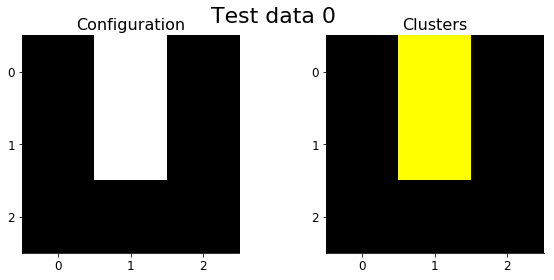

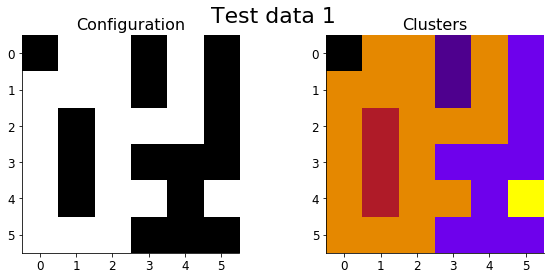

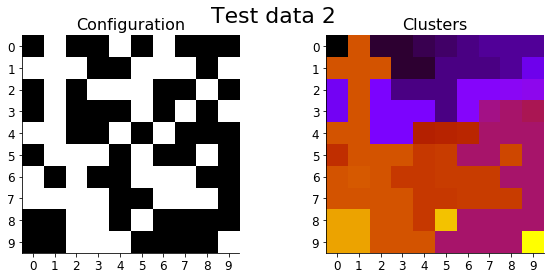

In [62]:
for i, config in enumerate([config_test_0, config_test_1, config_test_2]):
    labels = get_labels(config)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.set_xticks(range(len(config)))
    ax1.set_yticks(range(len(config)))
    ax2.set_xticks(range(len(config)))
    ax2.set_yticks(range(len(config)))
    ax1.set_title("Configuration")
    ax2.set_title("Clusters")
    ax1.imshow(config, cmap="Greys")
    ax2.imshow(labels, cmap="gnuplot")
    
    fig.suptitle(f"Test data {i}", fontsize=22)

If your function doesn't work, you might want to use this cell to inspect your results

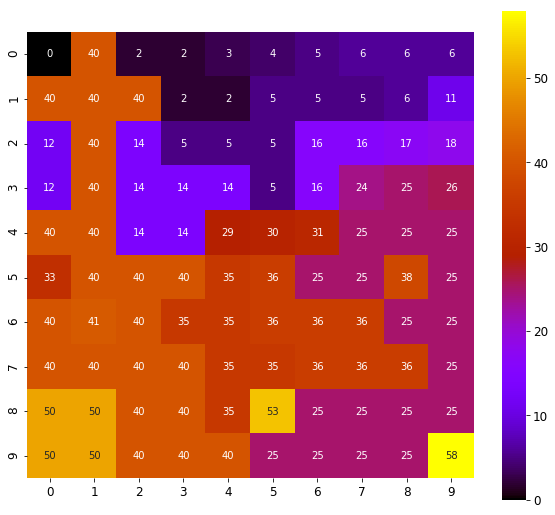

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.set_aspect(1)
sns.heatmap(labels, annot=True, ax=ax, cmap="gnuplot")

### Measuring cluster sizes
Use your `get_labels()` function to find clusters in a large Ising model, say $N=500$. You can use your own Ising implementation. If you use Sethna's code, remember that he uses $s \in \{0, 1\}$ spins!

In [78]:
N = 12
config = IsingModel(N).lattice
labels = get_labels(config)

KeyboardInterrupt: 

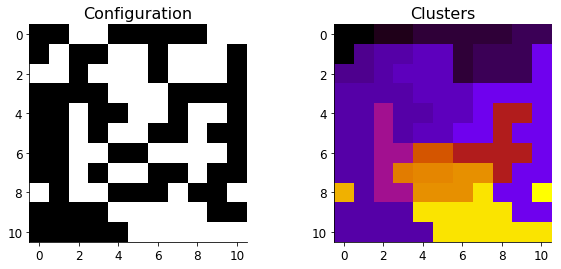

In [77]:
#plt.figure(figsize=(10, 8))
#plt.imshow(labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_title("Configuration")
ax2.set_title("Clusters")
ax1.imshow(config, cmap="Greys")
ax2.imshow(labels, cmap="gnuplot")

### Exercise
Find an efficient way to measure cluster sizes. Remind that all you care about is the distribution of cluster sizes, their location does not matter. You might want to use the `.reshape()` method of a numpy array, and the `Counter` class from the `collections` package.

In [ ]:
def get_sizes(labels):
    ...
    ...
    ...
    return sizes

### Exercise
For $T >> T_c$, spins are essentially uncorrelated. What is the distribution of cluster sizes you expect to find in this case? **Hint** Think about the 1D case assuming totally uncorrelated spins.

*Your answer here*



### Exercice
Do a simulation at very high temperature and measure the cluster size distribution. Plot your results in log-log scale. Do your results agree with your previous answer?

*Your answer here*

In [ ]:
...
...
config = ...
labels = get_labels(config)
sizes = get_sizes(labels)

In [ ]:
# use logarithmic bins and logarithmic axes!
bins = np.geomspace(min(sizes), max(sizes), num=20)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(sizes, bins=bins, histtype="step")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizes), max(sizes))

### Exercise

At $T_c$, the distribution of cluster sizes is known to be a power law with exponent close to $\alpha \simeq 2$.

$$
P(s) \propto s^{-\alpha}
$$

Do a simulation at $T=T_c$ and compare the resulting cluster size distribution with that obtained at $T>>T_c$.

In [ ]:
# do simulation
...
...


In [ ]:
# plot results
...
...